# 1. Imports:

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# 2. Read the dataset:

In [2]:
import pandas as pd
data= pd.read_csv('AAPL.csv', parse_dates=['date'])

In [3]:
data.head()

,open,high,low,close,adjclose,volume,ticker,date
0,0.128348,0.128906,0.128348,0.128348,0.101087,469033600.0,AAPL,1980-12-12
1,0.122210,0.122210,0.121652,0.121652,0.095813,175884800.0,AAPL,1980-12-15
2,0.113281,0.113281,0.112723,0.112723,0.088780,105728000.0,AAPL,1980-12-16
3,0.115513,0.116071,0.115513,0.115513,0.090978,86441600.0,AAPL,1980-12-17
4,0.118862,0.119420,0.118862,0.118862,0.093615,73449600.0,AAPL,1980-12-18


In [4]:
data.isnull().sum()

open        1
high        1
low         1
close       1
adjclose    1
volume      1
ticker      0
date        0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
date        0
dtype: int64

In [7]:
df = data.reset_index()['close']

In [8]:
df.index = data.date

In [9]:
df

date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
2021-01-11    128.979996
2021-01-12    128.800003
Name: close, Length: 10106, dtype: float64

# 3. Analyze the closing prices from dataframe:

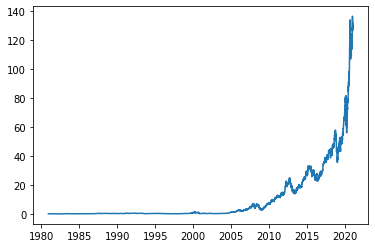

In [10]:
plt.plot(df)

# 5. scale the dataset:

In [11]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
df1 = sc.fit_transform(np.array(df).reshape(-1,1))


# 6. split data into train and test:

In [12]:
training_size = int(len(df1)*0.8)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
#convert an array of values into a dataset matrix
def create_dataset(dataset , time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return np.array(dataX) , np.array(dataY)

In [14]:
time_step=100
X_train , y_train = create_dataset(train_data , time_step)
X_test , ytest = create_dataset(test_data , time_step)

In [15]:
print(X_train.shape),print(y_train.shape)

(7983, 100)
(7983,)


(None, None)

In [16]:
#reshape input to be [samples , time steps , features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1) 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
125/125 [==============================] - 29s 183ms/step - loss: 2.6653e-04 - val_loss: 0.0031
Epoch 2/100
125/125 [==============================] - 21s 167ms/step - loss: 5.7933e-06 - val_loss: 0.0031
Epoch 3/100
125/125 [==============================] - 20s 162ms/step - loss: 5.2269e-06 - val_loss: 0.0047
Epoch 4/100
125/125 [==============================] - 20s 162ms/step - loss: 5.2304e-06 - val_loss: 0.0029
Epoch 5/100
125/125 [==============================] - 19s 154ms/step - loss: 4.1995e-06 - val_loss: 0.0025
Epoch 6/100
125/125 [==============================] - 19s 155ms/step - loss: 4.3520e-06 - val_loss: 0.0023
Epoch 7/100
125/125 [==============================] - 19s 153ms/step - loss: 3.5845e-06 - val_loss: 0.0014
Epoch 8/100
125/125 [==============================] - 19s 155ms/step - loss: 3.7700e-06 - val_loss: 0.0016
Epoch 9/100
125/125 [==============================] - 19s 155ms/step - loss: 3.9214e-06 - val_loss: 0.0017
Epoch 10/100
125/125 [======

In [ ]:
#let s do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
#transformback to original form
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

In [ ]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
#test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
ytest_tr = sc.inverse_transform(ytest.reshape(-1,1))
ytest_tr = pd.DataFrame(ytest_tr)
test_predict = pd.DataFrame(test_predict)
plt.figure(figsize=(12,8))
plt.plot(ytest_tr, color='blue', label='Real')
plt.plot(test_predict , color='red', label='Prediction')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()